<a href="https://colab.research.google.com/github/ReVuz/R_programming/blob/main/qn12_13_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("zoo")
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’




Suppose we have a dataset of motor trend car road tests (mtcars). The dataset contains information about 32 car brands and 11 attributes. We want to investigate the correlation between the horsepower (hp) and miles per gallon (mpg). Perform a Pearson correlation test to analyze this relationship.


	Pearson's product-moment correlation

data:  mtcars$hp and mtcars$mpg
t = -6.7424, df = 30, p-value = 1.788e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8852686 -0.5860994
sample estimates:
       cor 
-0.7761684 



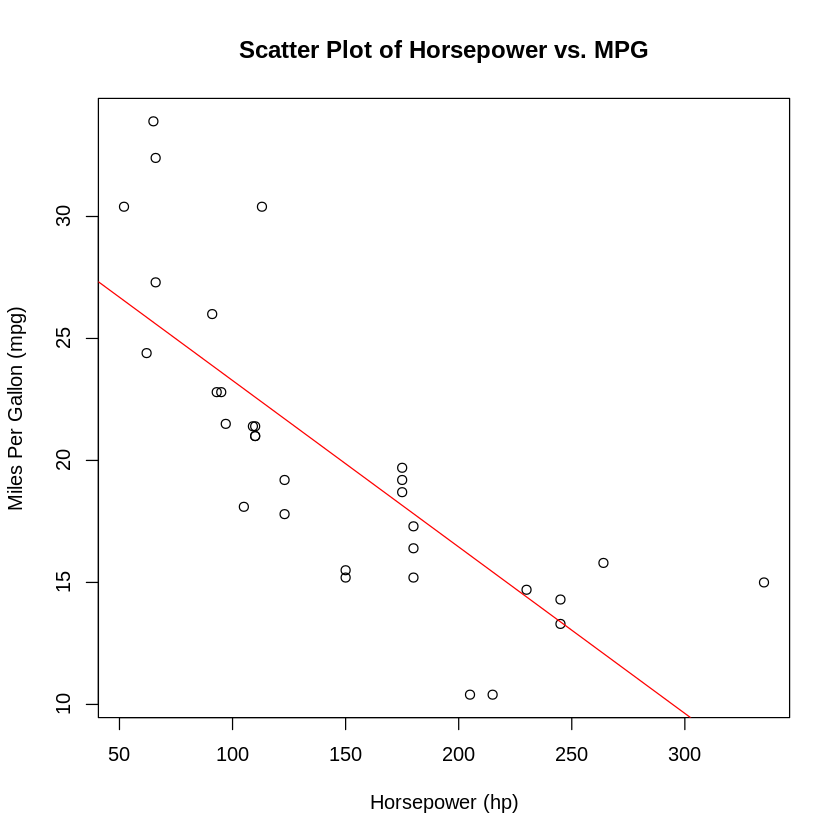

In [1]:
# Load the mtcars dataset (if not loaded)
data(mtcars)

# Perform Pearson correlation test
correlation <- cor.test(mtcars$hp, mtcars$mpg, method = "pearson")

# Print the correlation test results
print(correlation)
plot(mtcars$hp, mtcars$mpg, main = 'Scatter Plot of Horsepower vs. MPG',
xlab = 'Horsepower (hp)', ylab = 'Miles Per Gallon (mpg)')
abline(lm(mpg ~ hp, data = mtcars), col = 'red')

In [2]:
data(mtcars)
str(mtcars)
anova_result <- aov(disp ~ gear, data = mtcars)
summary(anova_result)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


            Df Sum Sq Mean Sq F value   Pr(>F)    
gear         1 146978  146978   13.39 0.000964 ***
Residuals   30 329207   10974                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Suppose we have a dataset of motor trend car road tests (mtcars). The dataset contains information about 32 car brands and 11 attributes. We want to investigate whether there are any significant variations in the average displacement (disp) across different gear types (gear). Perform a one-way ANOVA test to analyze this

In [ ]:
# Load the mtcars dataset (if not loaded)
data(mtcars)

# Perform one-way ANOVA test
anova_result <- aov(disp ~ as.factor(gear), data = mtcars)

# Summary of the ANOVA test
summary(anova_result)


                Df Sum Sq Mean Sq F value   Pr(>F)    
as.factor(gear)  2 280221  140110   20.73 2.56e-06 ***
Residuals       29 195964    6757                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
We want to investigate the behavior of the total positive COVID-19 cases weekly from 22 January 2020 to 15 December 2020 in India. Perform the following tasks:

Dataset Link : https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv

Univariate Time Series Analysis:

Create a time series object for the total positive COVID-19 cases

Visualize the time series data using a line chart.

Multivariate Time Series Analysis:

Also, consider the total deaths from COVID-19 during the same period.

Create a multivariate time series object that includes both the total positive cases and total deaths.

Plot both series on a single chart.

Time Series Forecasting:

Use the auto.arima() function from the forecast library to fit an ARIMA model to the total positive cases.

Forecast the next 5 data points.

Plot the forecasted values.

Rows: 231744 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Country/Region, Province/State
dbl  (3): Confirmed, Recovered, Deaths
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Date"           "Country/Region" "Province/State" "Confirmed"     
[5] "Recovered"      "Deaths"

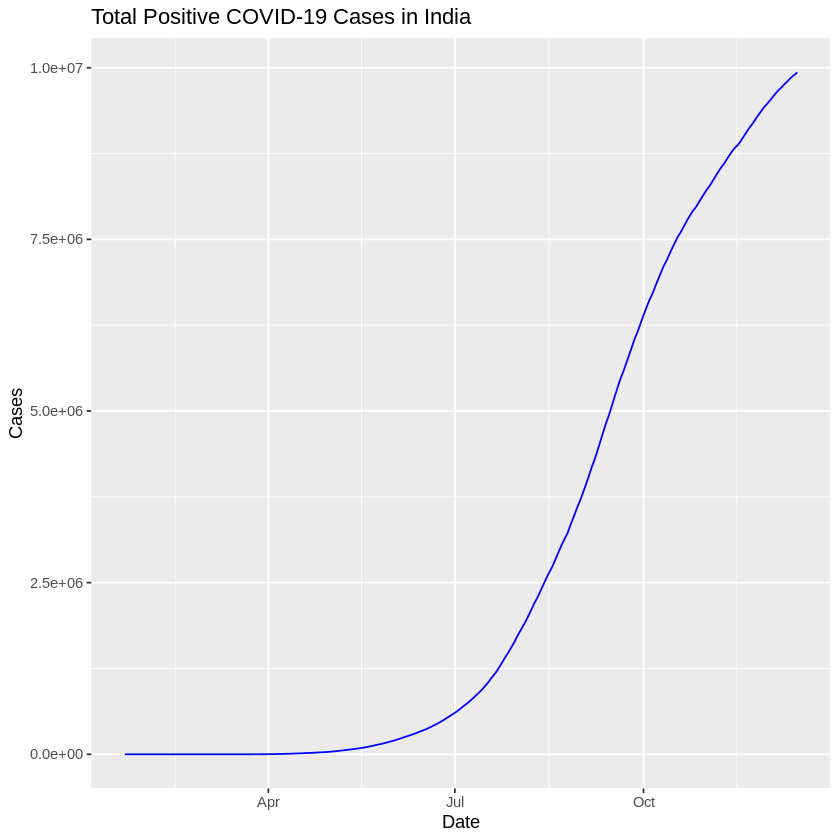

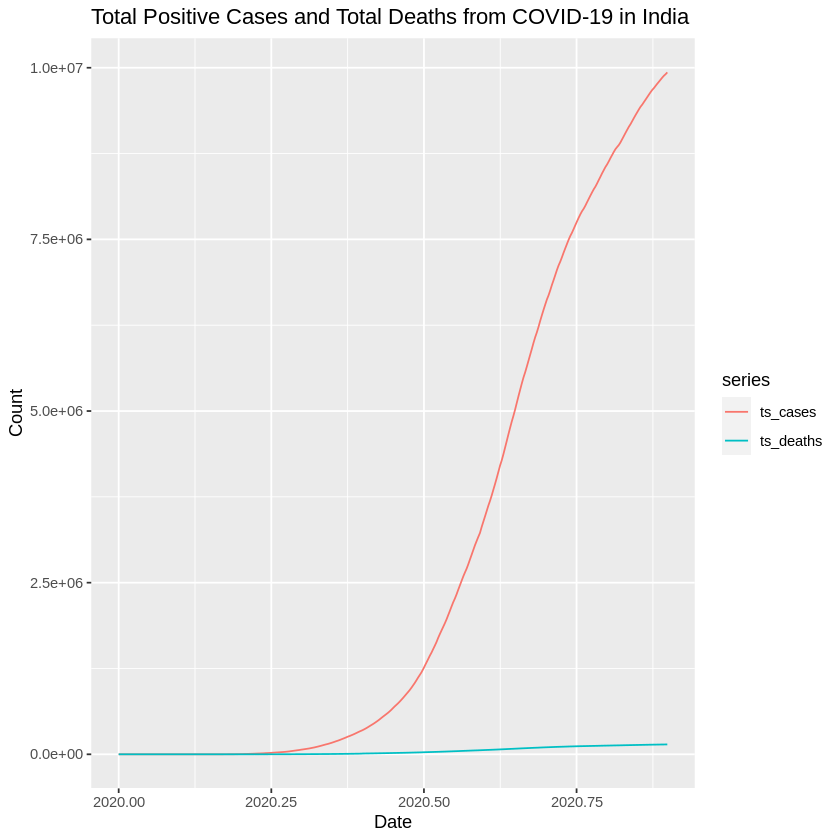

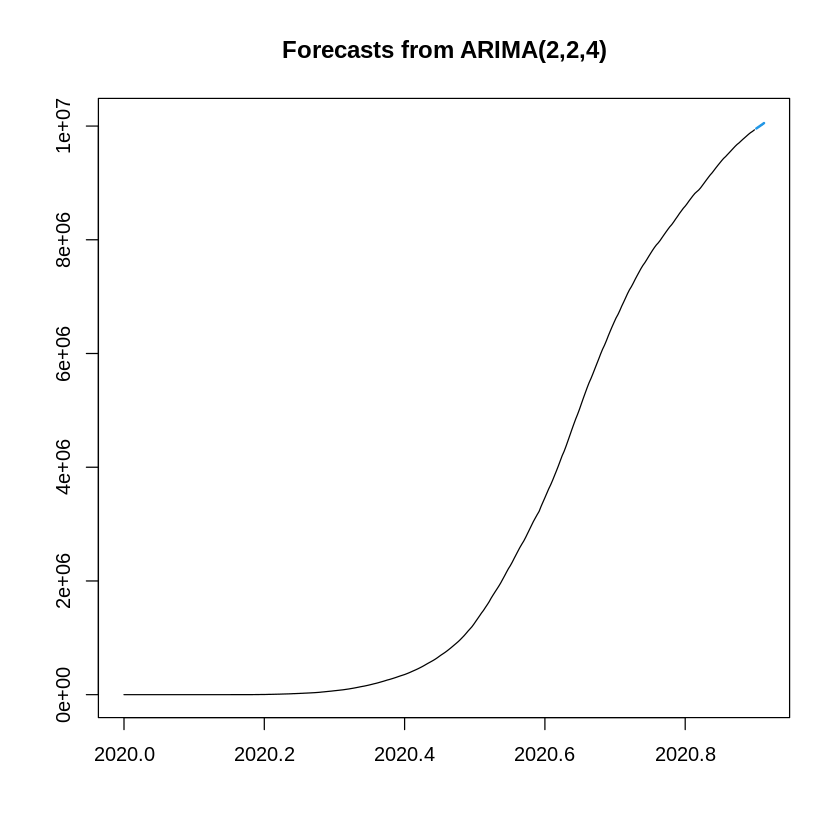

In [ ]:
# Load the required libraries
library(readr)
library(dplyr)
library(lubridate)
library(zoo)
library(forecast)
library(ggplot2)

# Read the dataset from the link
data <- read_csv("time-series-19-covid-combined.csv")

# Check the column names in the dataset
names(data)

# Filter the data for India and the date range
data_india <- data %>%
  filter(`Country/Region` == "India" & as.Date(Date) >= as.Date("2020-01-22") & as.Date(Date) <= as.Date("2020-12-15"))

# Univariate Time Series Analysis

# Create a time series object for the total positive COVID-19 cases
ts_cases <- ts(data_india$Confirmed, start = c(2020, 1), frequency = 365)

# Visualize the time series data using a line chart
ggplot(data_india, aes(x = Date, y = Confirmed)) +
  geom_line(color = "blue") +
  labs(title = "Total Positive COVID-19 Cases in India", x = "Date", y = "Cases")

# Multivariate Time Series Analysis

# Also, consider the total deaths from COVID-19 during the same period
ts_deaths <- ts(data_india$Deaths, start = c(2020, 1), frequency = 365)

# Create a multivariate time series object that includes both the total positive cases and total deaths
ts_multi <- cbind(ts_cases, ts_deaths)

# Plot both series on a single chart
autoplot(ts_multi) +
  labs(title = "Total Positive Cases and Total Deaths from COVID-19 in India", x = "Date", y = "Count")

# Time Series Forecasting

# Use the auto.arima() function from the forecast library to fit an ARIMA model to the total positive cases
model <- auto.arima(ts_cases)

# Forecast the next 5 data points
forecast <- forecast(model, h = 5)

# Plot the forecasted values
plot(forecast)

Rows: 231744 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Country/Region, Province/State
dbl  (3): Confirmed, Recovered, Deaths
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


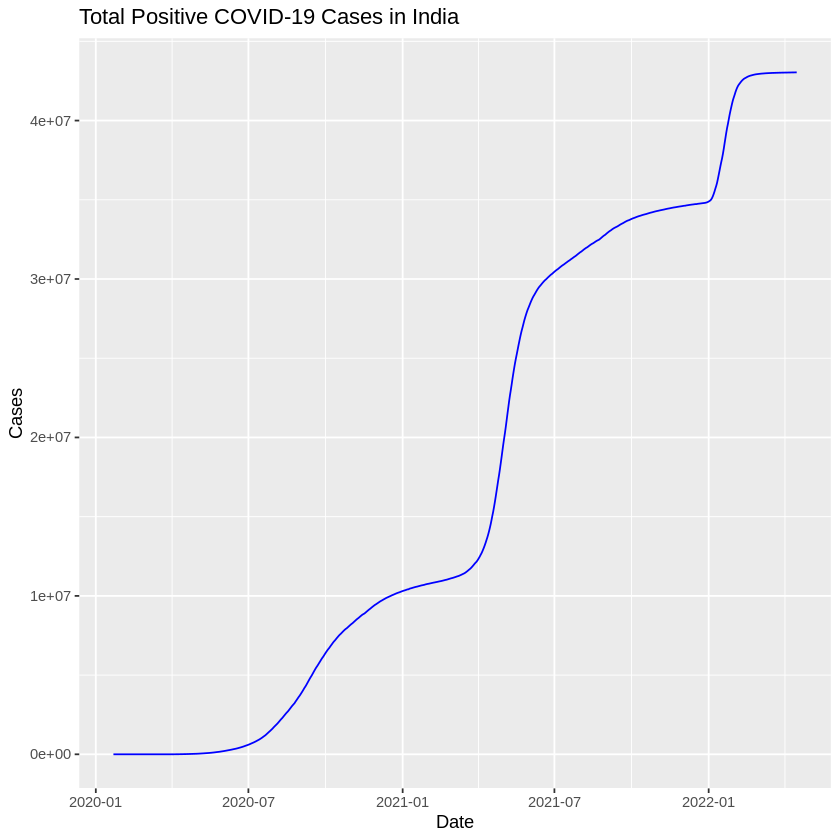

In [ ]:
# Load the required packages
library(readr)
library(dplyr)

# Read the dataset from the link
data <- read_csv("time-series-19-covid-combined.csv")

# Filter the data for India
data_india <- data %>%
  filter(`Country/Region` == "India")

# Extract the Date and Confirmed columns
data_india <- data_india %>%
  select(Date, Confirmed)

# Convert the Date column to a date format
data_india$Date <- as.Date(data_india$Date)

# Create a time series object for the total positive cases
ts_cases <- ts(data_india$Confirmed, start = c(2020, 1), end = c(2020, 329), frequency = 365)

# Plot the time series data using a line chart
ggplot(data_india, aes(x = Date, y = Confirmed)) +
  geom_line(color = "blue") +
  labs(title = "Total Positive COVID-19 Cases in India", x = "Date", y = "Cases")

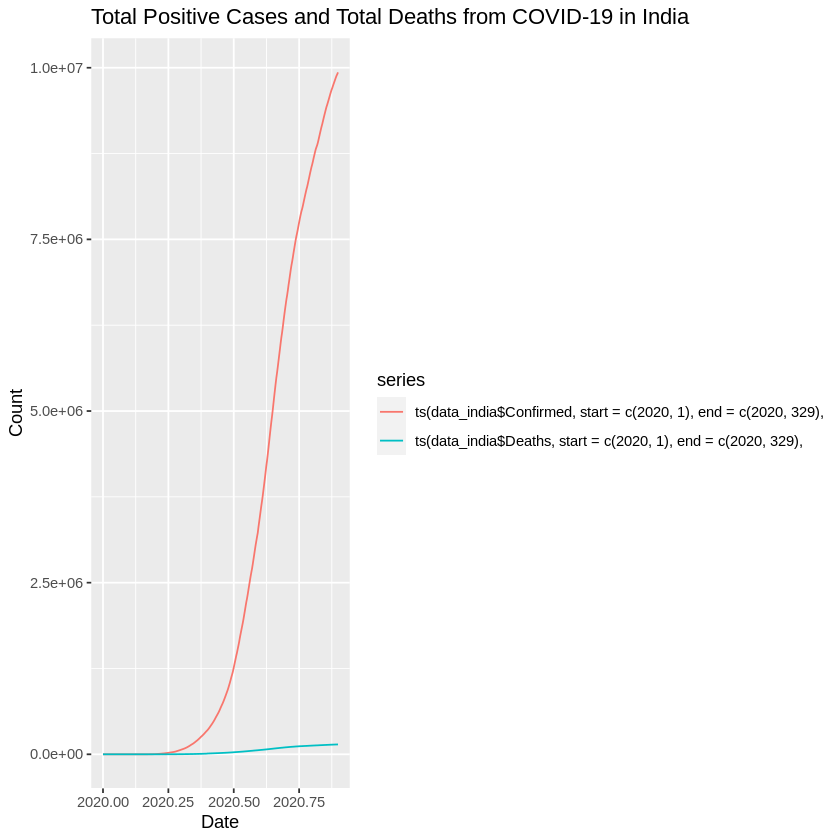

In [ ]:
# Filter the data for India and the date range
data_india <- data %>%
  filter(`Country/Region` == "India" & Date >= as.Date("2020-01-22") & Date <= as.Date("2020-12-15"))

# Create a multivariate time series object
ts_multi <- cbind(ts(data_india$Confirmed, start = c(2020, 1), end = c(2020, 329), frequency = 365),
                  ts(data_india$Deaths, start = c(2020, 1), end = c(2020, 329), frequency = 365))

# Plot both series on a single chart
autoplot(ts_multi) +
  labs(title = "Total Positive Cases and Total Deaths from COVID-19 in India", x = "Date", y = "Count")

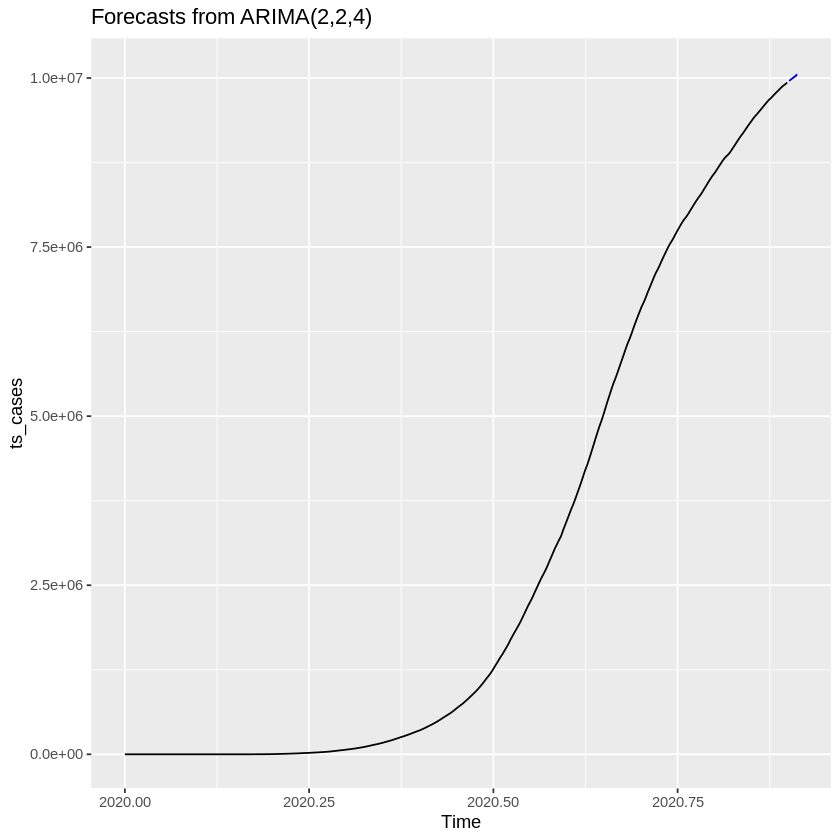

In [ ]:
# Filter the data for India and the date range
data_india <- data %>%
  filter(`Country/Region` == "India" & Date >= as.Date("2020-01-22") & Date <= as.Date("2020-12-15"))

# Create a time series object for the total positive cases
ts_cases <- ts(data_india$Confirmed, start = c(2020, 1), end = c(2020, 329), frequency = 365)

# Fit an ARIMA model using the auto.arima() function
model <- auto.arima(ts_cases, ic = "aic", max.d = 2)

# Forecast the next 5 data points using the forecast() function
fcst <- forecast(model, h = 5)

# Plot the forecasted values using the autoplot() function
autoplot(fcst)